# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Matched Filter
***

Referring to Section 8.3, the matched filter is an intrapulse compression technique commonly used in radar systems.  The matched filter is the optimal linear filter that maximizes the signal-to-noise ratio in the presence of additive random noise.  The term ***matched*** comes about as the filter impulse response is matched to the radar transmit signal.  These were first referred to as ***North filters***, as the concept first appeared in a report by North in 1943. 

Employing the frequency domain form of (Equation 8.22) allows the output of the matched filter to be written as (Equation 8.35)

$$
    s_o(t) = \mathcal{F}^{-1}\Big\{ \mathcal{F}\{ h(t) \} \times \mathcal{F}\{ s_i(t) \} \Big\},
$$

where $s_i(t)$ = matched filter input signal, $h(t)$ = matched filter impulse response, $s_0(t)$ = matched filter output.
***

Set the bandwidth (Hz), the pulsewidth (s), the target range (m) and the target radar cross section (m^2)

In [1]:
bandwidth = 30e6

pulsewidth = 10e-6

target_range = [10.0, 50.0, 100.0]

target_rcs = [1.0, 3.0, 2.0]

Set the number of samples for matched filtering

In [2]:
N = int(2 * bandwidth * pulsewidth) * 8

Set the window type (Kaiser, Blackman-Harris, Hanning, Hamming, or Rectangular)

In [3]:
window_type = 'Hanning'

Get the window coefficients using the routines from `scipy.signal.windows`

In [4]:
from scipy.signal.windows import hann, hamming, blackmanharris, kaiser 

from scipy import ones
    
    
if window_type == 'Kaiser':

    coefficients = kaiser(N, 6, True)

elif window_type == 'Blackman-Harris':

    coefficients = blackmanharris(N, True)

elif window_type == 'Hanning':

    coefficients = hann(N, True)

elif window_type == 'Hamming':

    coefficients = hamming(N, True)

elif window_type == 'Rectangular':

    coefficients = ones(N)

Set up the time vector (s) for the matched filter using the `linspace` routine from `scipy`

In [5]:
from scipy import linspace

t = linspace(-0.5 * pulsewidth, 0.5 * pulsewidth, N)

Calculate the baseband return signal

In [6]:
from scipy import zeros, sqrt, exp, conj

from scipy.constants import pi, c


s = zeros(N, dtype=complex)


# Chirp slope

alpha = 0.5 * bandwidth / pulsewidth



# Loop over all the targets

for r, rcs in zip(target_range, target_rcs):

    s += sqrt(rcs) * exp(1j * 2.0 * pi * alpha * (t - 2.0 * r / c) ** 2)

Generate the transmitted signal

In [7]:
st = exp(1j * 2 * pi * alpha * t ** 2)

Get the impulse reponse and perform the matched filtering using the `fftpack` routines from `scipy`

In [8]:
from scipy.fftpack import ifft, fft, fftshift

Hf = fft(conj(st * coefficients))

Si = fft(s)

so = fftshift(ifft(Si * Hf))

Set up the range window for plotting

In [9]:
range_window = linspace(-0.25 * c * pulsewidth, 0.25 * c * pulsewidth, N)

Display the results of matched filtering using the `matplotlib` routines

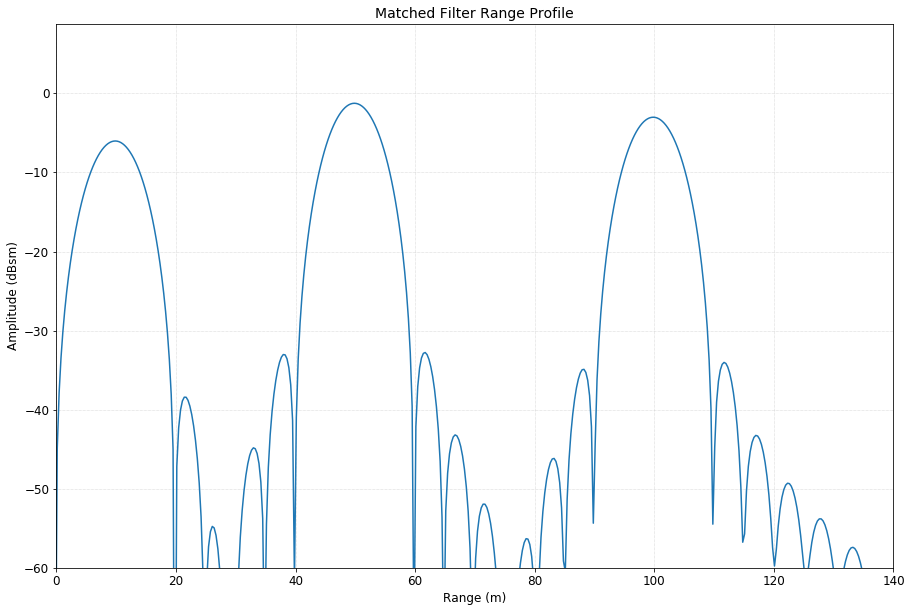

In [11]:
from matplotlib import pyplot as plt

from scipy import log10, finfo


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Create the line plot

plt.plot(range_window, 20.0 * log10(abs(so) / N + finfo(float).eps), '')

plt.xlim(0, max(target_range) +  4 * c / bandwidth)

plt.ylim(-60, max( 20.0 * log10(abs(so) / N)) + 10)



# Set the x and y axis labels

plt.xlabel("Range (m)", size=12)

plt.ylabel("Amplitude (dBsm)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Set the plot title and labels

plt.title('Matched Filter Range Profile', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)